# Uber Data Analysis

<b>Introduction</b>

Uber is a multinational transportation network company that operates a platform connecting riders with drivers through a mobile app. It was founded in 2009 and has since become one of the most well-known examples of a ride-hailing service. Uber allows users to request a ride from their current location to a desired destination using their smartphone. The app matches the user with an available driver in the area, and the driver arrives to pick up the passenger.

Uber offers various types of services, including UberX (standard car), UberXL (larger vehicles), UberBlack (luxury vehicles), and UberPOOL (shared rides with other passengers traveling in the same direction). The fares for rides are calculated based on factors such as distance traveled, time spent on the trip, and demand at the time of the request.

Uber has gained popularity for its convenience, ease of use, and competitive pricing compared to traditional taxi services. It has expanded its operations to numerous cities around the world and has also introduced other services like food delivery (Uber Eats) and package delivery (Uber Connect).

<b>Objective</b>

1)Understand Ride Patterns: Investigate the patterns and trends in ride data to uncover key metrics such as average ride duration, ride frequency, and distance traveled.

2)Identify Popular Categories: Explore the popularity of different ride categories, examining which types of rides are most prevalent among users.

3)Temporal Analysis: Analyze temporal aspects of ride-sharing, including variations in ride volume and user behavior across different timescales, such as days of the week and hours of the day.

4)User Segmentation: Segment users based on relevant characteristics and explore how different user groups interact with the ride-sharing service.

5)Uncover Challenges and Opportunities: Identify challenges and limitations in the dataset, acknowledging potential biases, and highlight opportunities for improvement or further investigation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data=pd.read_csv('E:\\UberDataset.csv')

In [43]:
uber_data=data.copy()

In [44]:
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [45]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [46]:
uber_data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [47]:
uber_data[uber_data['PURPOSE'].isnull()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,02-09-2016 10:54,02-09-2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,02-09-2016 11:43,02-09-2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,02-09-2016 13:36,02-09-2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN


In [48]:
uber_data['PURPOSE'].fillna("Not Disclosed",inplace=True)

In [49]:
uber_data.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [50]:
uber_data.dropna(inplace=True)

In [51]:
uber_data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [52]:
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Disclosed
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [53]:
uber_data['START'] = uber_data['START'].str.replace('Kar?chi', 'Karachi')
uber_data['STOP'] = uber_data['STOP'].str.replace('Kar?chi', 'Karachi')

In [54]:
uber_data['START'] = uber_data['START'].str.replace('R?walpindi', 'Rawalpindi')
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Disclosed
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [55]:
from datetime import datetime

In [62]:
df = pd.DataFrame(uber_data)

In [63]:
#Arranging START_DATE & END_DATE in one format 
def standardize_date(date_str):
    try:
        # Try parsing the date with one format, and if it fails, try the other format
        date_obj = pd.to_datetime(date_str, format='%m-%d-%Y %H:%M', errors='raise')
    except ValueError:
        date_obj = pd.to_datetime(date_str, format='%m/%d/%Y %H:%M', errors='raise')
    
    return date_obj.strftime('%m-%d-%Y %H:%M') if not pd.isna(date_obj) else None

# Apply the function to the 'Date' column
df['START_DATE'] = df['START_DATE'].apply(standardize_date)
df['END_DATE'] = df['END_DATE'].apply(standardize_date)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Disclosed
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12-31-2016 01:07,12-31-2016 01:14,Business,Karachi,Karachi,0.7,Meeting
1151,12-31-2016 13:24,12-31-2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12-31-2016 15:03,12-31-2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12-31-2016 21:32,12-31-2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [64]:
uber_data.CATEGORY.unique()

array(['Business', 'Personal'], dtype=object)

In [65]:
uber_data.PURPOSE.unique()

array(['Meal/Entertain', 'Not Disclosed', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [67]:
#Finding High Demand Area
uber_data['START'].value_counts()

START
Cary                 201
Unknown Location     148
Morrisville           85
Whitebridge           68
Islamabad             57
                    ... 
Ridgeland              1
Daytona Beach          1
Sky Lake               1
Sand Lake Commons      1
Gampaha                1
Name: count, Length: 175, dtype: int64

In [71]:
# Convert date columns to datetime with inferred format and handling errors

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [72]:
# Extract date-related features
df['START_DAY'] = df['START_DATE'].dt.day_name()
df['END_DAY'] = df['END_DATE'].dt.day_name()

In [74]:
# Calculate duration of the trip
df['DURATION_MINUTES'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

In [75]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_DAY,END_DAY,DURATION_MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,Friday,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Disclosed,Saturday,Saturday,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,Wednesday,67.0
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,Saturday,Saturday,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,Saturday,Saturday,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Saturday,Saturday,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Saturday,Saturday,18.0


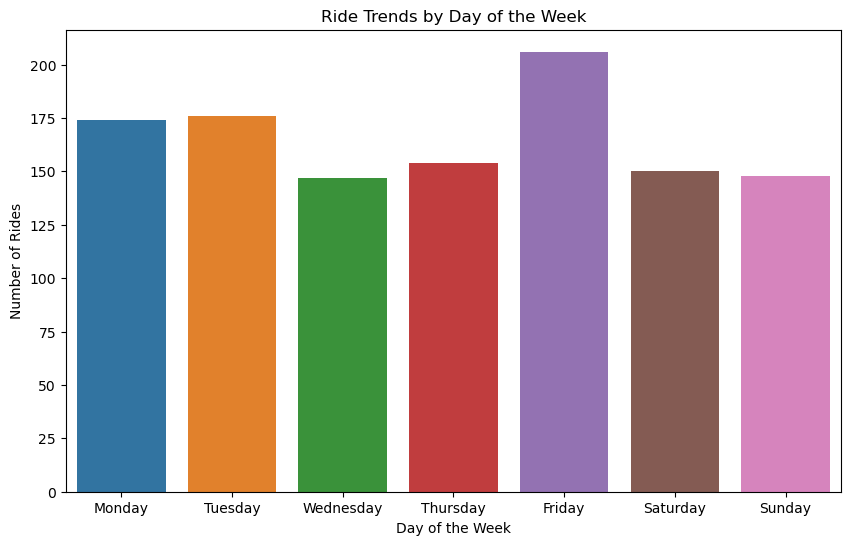

In [77]:
# Day of the week analysis
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(x='START_DAY', data=df, order=day_of_week_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Ride Trends by Day of the Week')
plt.show()

In [78]:
average_distance_travelled = df.groupby('PURPOSE')['MILES'].mean()
average_distance_travelled

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Not Disclosed        9.748008
Temporary Site      10.474000
Name: MILES, dtype: float64

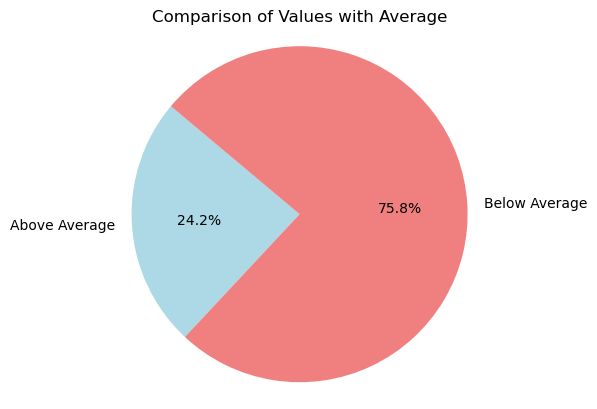

In [79]:
average_value = df['MILES'].mean()
# Compare values with the average and categorize them
above_average = df[df['MILES'] > average_value].shape[0]
below_average = df[df['MILES'] <= average_value].shape[0]
# Data for the pie chart
sizes = [above_average, below_average]
labels = ['Above Average', 'Below Average']
colors = ['lightblue', 'lightcoral']
# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Comparison of Values with Average')
plt.show()

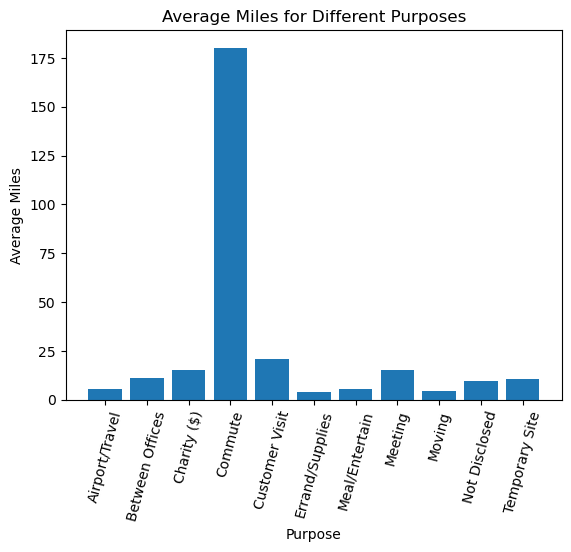

In [88]:
plt.bar(average_distance_travelled.index, average_distance_travelled.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Different Purposes')
plt.xticks(rotation=75)
plt.show()

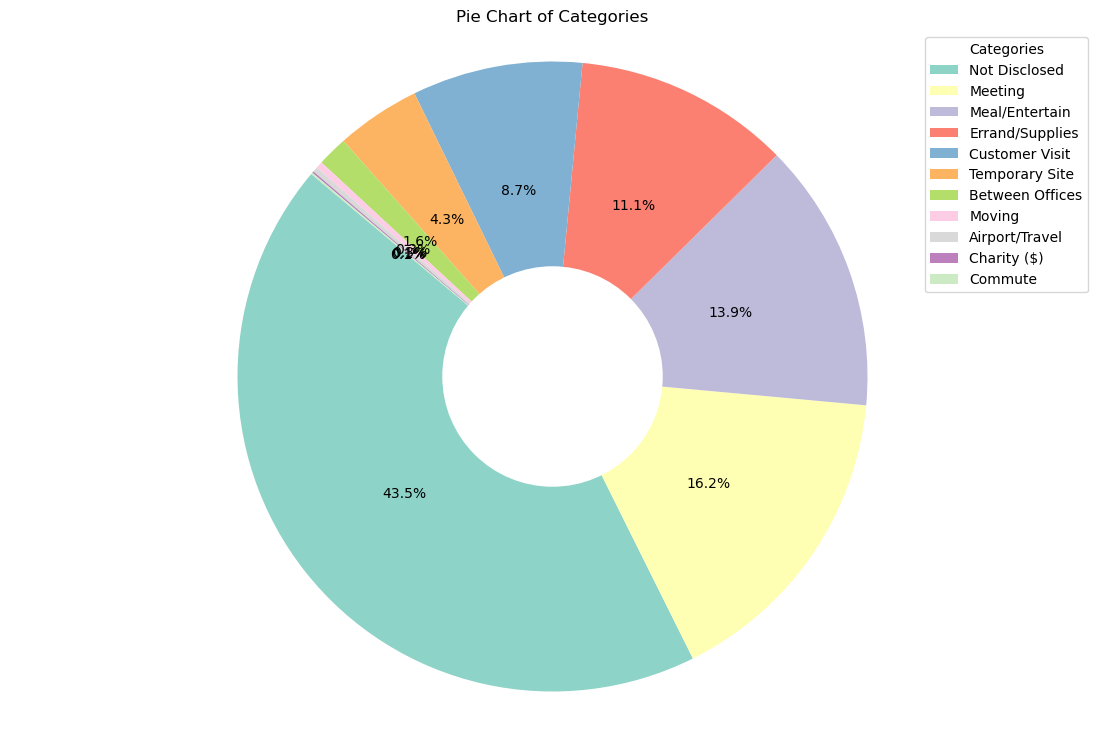

In [89]:
# Count the occurrences of each category
category_counts = df['PURPOSE'].value_counts()

# Data for the pie chart
sizes = category_counts.values
labels = category_counts.index
colors = plt.cm.Set3.colors # Choose a colormap
# Create a pie chart
plt.figure(figsize=(14,9))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') # Equal aspect ratio ensures the pie chart is circular.
# Adding white circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.35,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels, title='Categories', loc='best')
plt.title('Pie Chart of Categories')
plt.show()

In [90]:
# Extract information about the month, day, and hour
df['Month'] = df['START_DATE'].dt.month
df['Day'] = df['START_DATE'].dt.day
df['Hour'] = df['START_DATE'].dt.hour

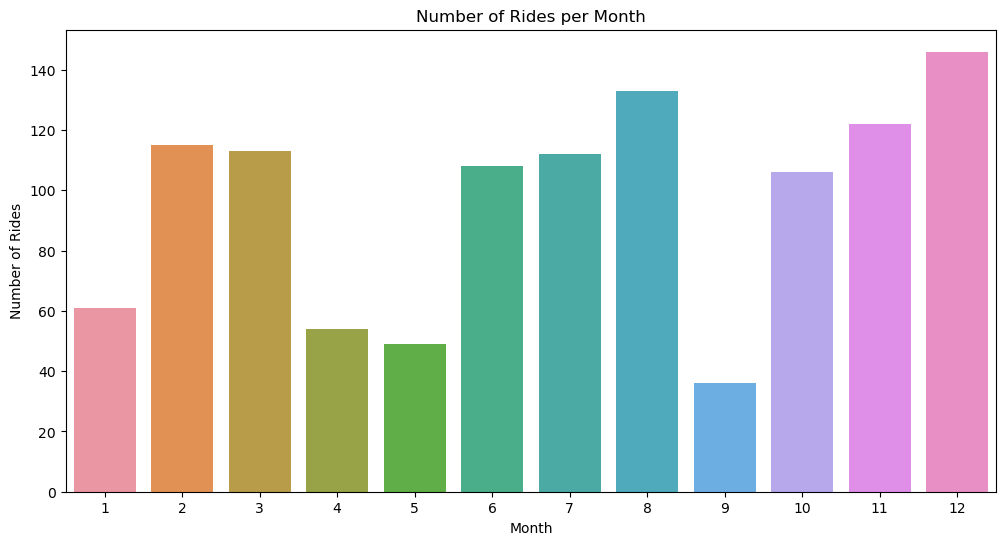

In [91]:
# Plot the number of rides per month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

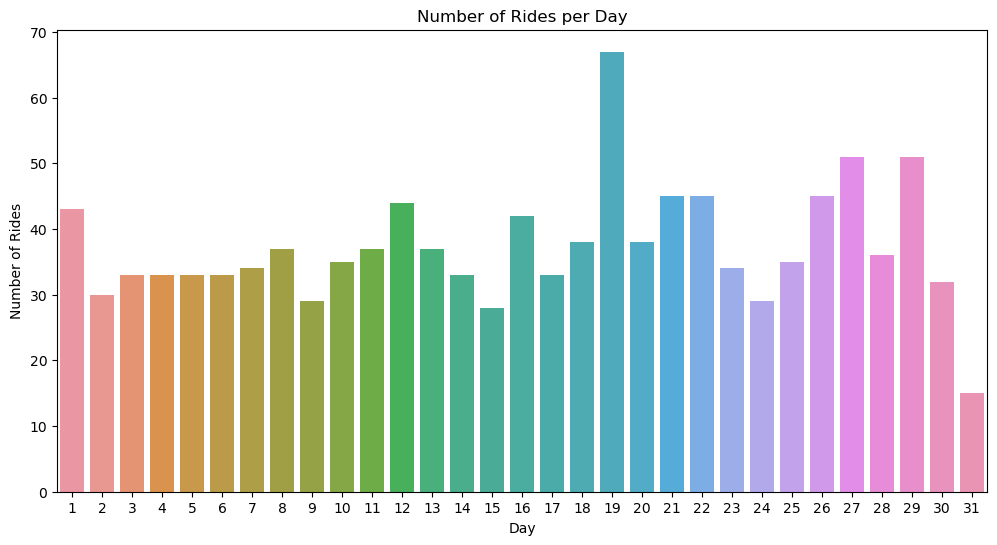

In [92]:
# Plot the number of rides per day
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', data=df)
plt.title('Number of Rides per Day')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()

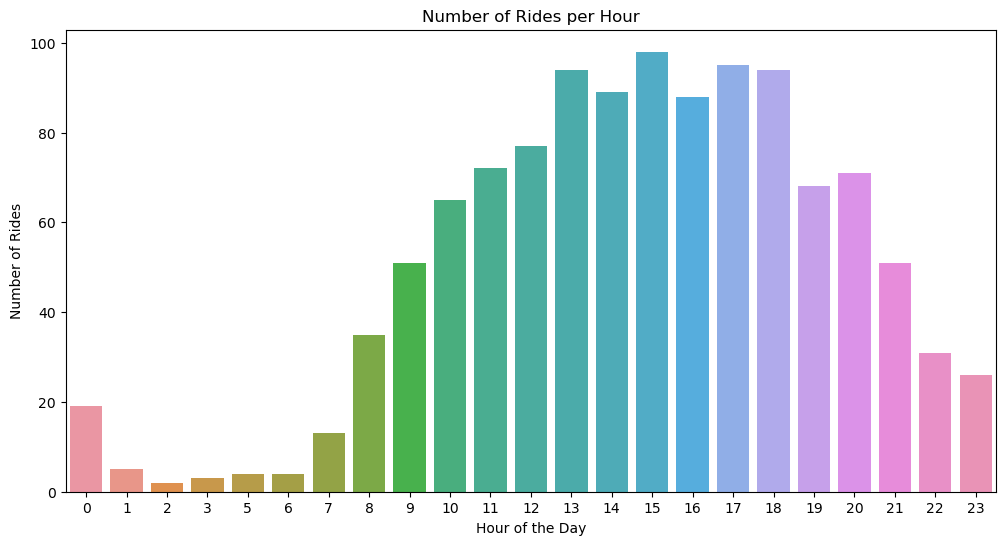

In [93]:
# Plot the number of rides per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

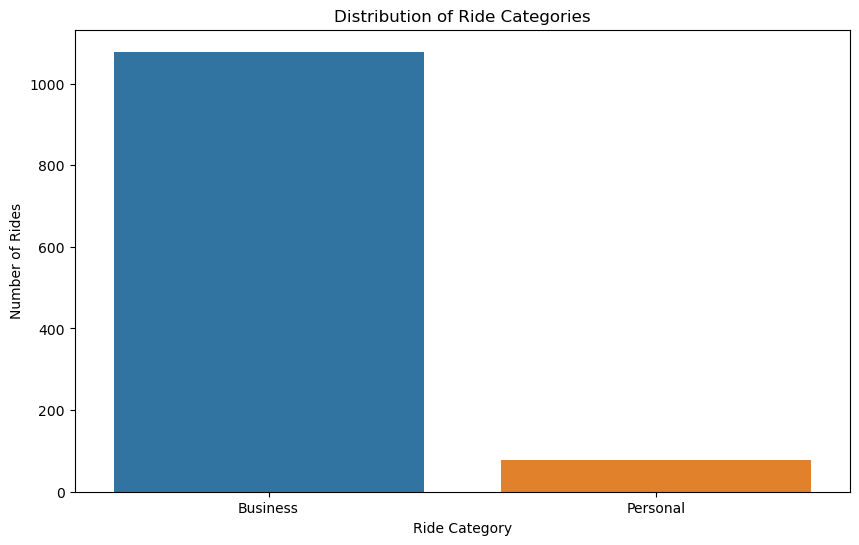

In [94]:
# Plot the distribution of ride categories
plt.figure(figsize=(10, 6))
sns.countplot(x='CATEGORY', data=df, order=df['CATEGORY'].value_counts().index)
plt.title('Distribution of Ride Categories')
plt.xlabel('Ride Category')
plt.ylabel('Number of Rides')
plt.show()

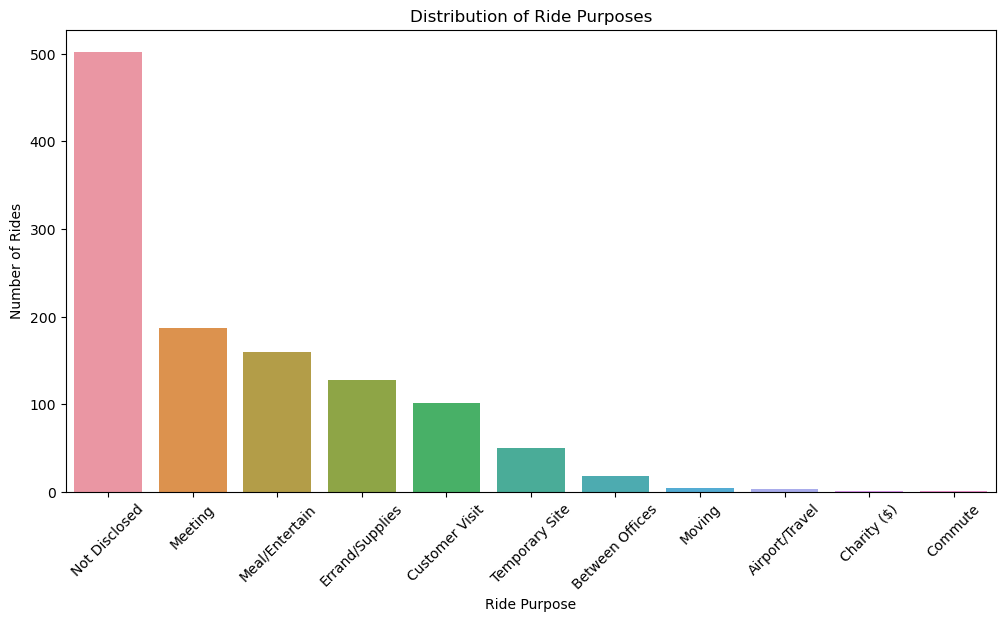

In [95]:
# Plot the distribution of ride purposes
plt.figure(figsize=(12, 6))
sns.countplot(x='PURPOSE', data=df, order=df['PURPOSE'].value_counts().index)
plt.title('Distribution of Ride Purposes')
plt.xlabel('Ride Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

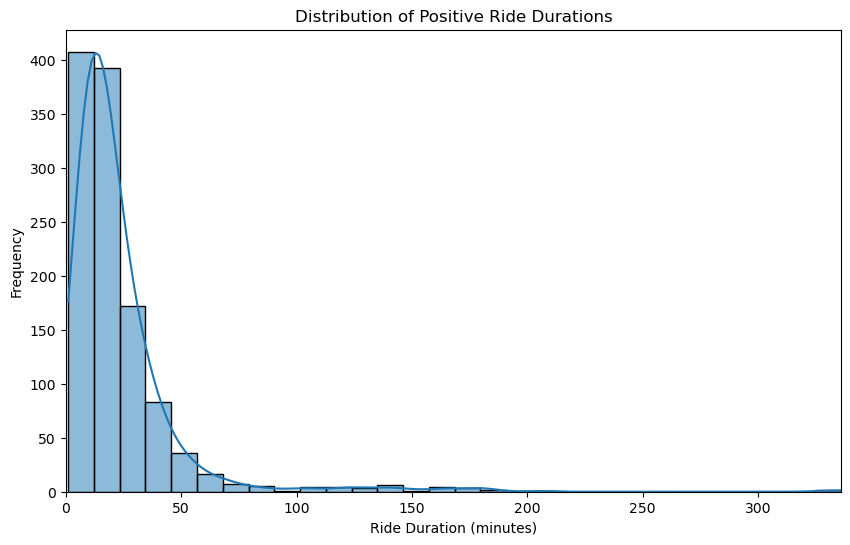

In [96]:
# Filter out rides with a duration greater than 0
positive_durations = df[df['DURATION_MINUTES'] > 0]['DURATION_MINUTES']

# Distribution of positive ride durations in minutes
plt.figure(figsize=(10, 6))
sns.histplot(positive_durations, bins=30, kde=True)
plt.title('Distribution of Positive Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, positive_durations.max())  # Set the x-axis range
plt.show()

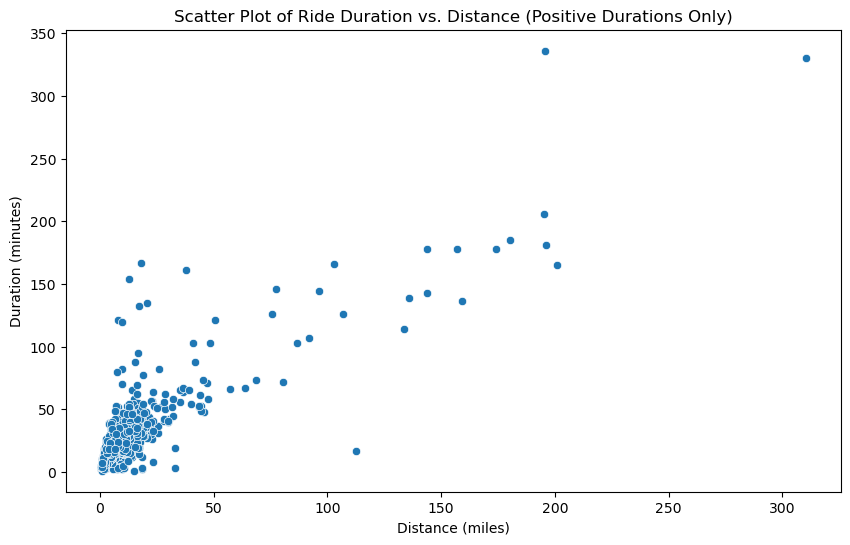

In [97]:
# Filter out rides with a duration greater than 0
positive_durations = df[df['DURATION_MINUTES'] > 0]

# Scatter plot of ride duration against distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MILES', y='DURATION_MINUTES', data=positive_durations)
plt.title('Scatter Plot of Ride Duration vs. Distance (Positive Durations Only)')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.show()

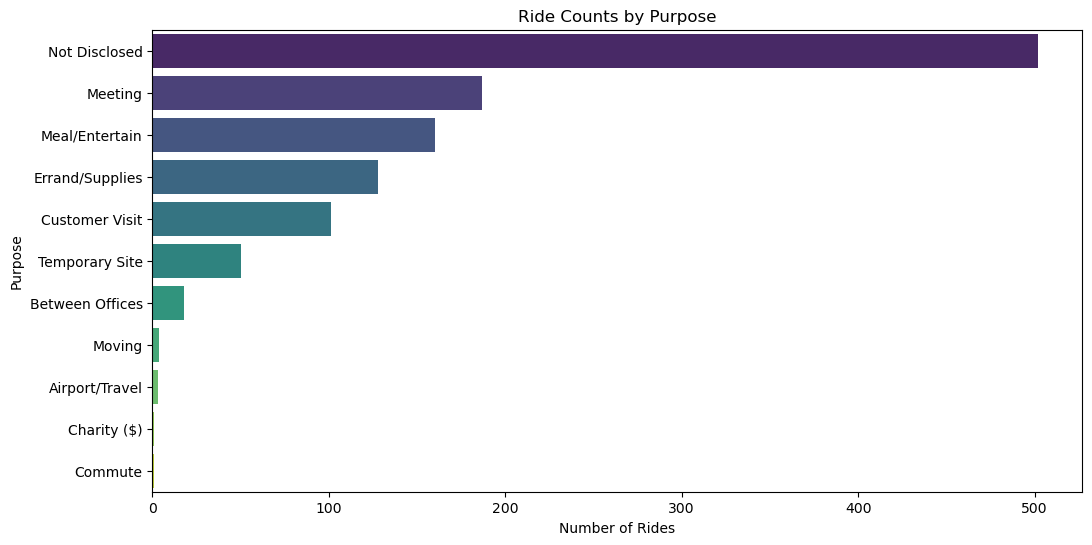

In [98]:
ride_purpose_counts = df['PURPOSE'].value_counts()

# Plot the distribution of ride counts per purpose
plt.figure(figsize=(12, 6))
sns.barplot(x=ride_purpose_counts.values, y=ride_purpose_counts.index, palette='viridis')
plt.title('Ride Counts by Purpose')
plt.xlabel('Number of Rides')
plt.ylabel('Purpose')
plt.show()

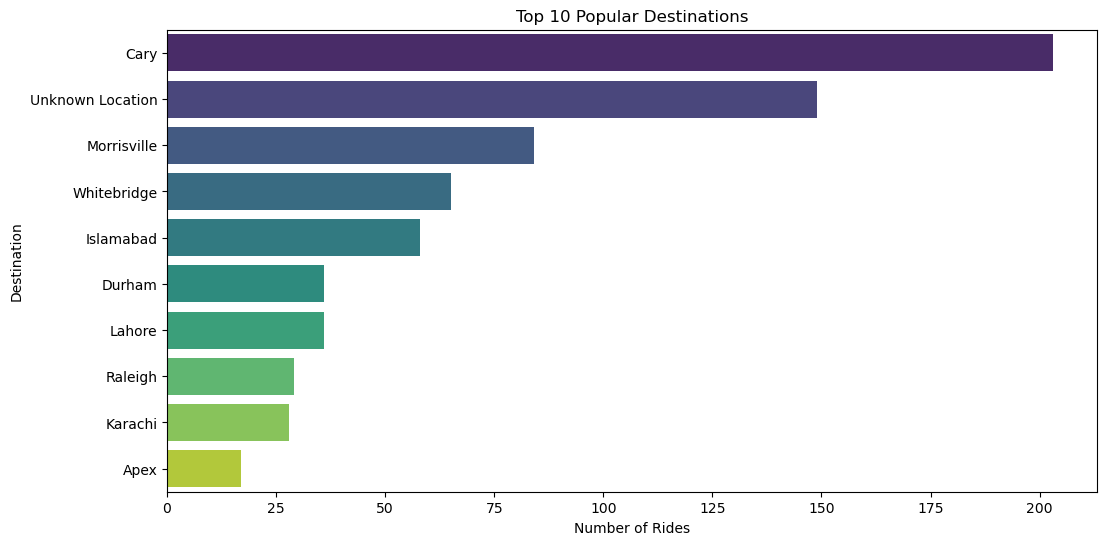

In [100]:
popular_destinations = df['STOP'].value_counts().head(10)

# Plot the top 10 popular destinations
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_destinations.values, y=popular_destinations.index, palette='viridis')
plt.title('Top 10 Popular Destinations')
plt.xlabel('Number of Rides')
plt.ylabel('Destination')
plt.show()

# Conclusion

The analysis of the rideshare dataset reveals several key insights into user behavior, ride patterns, and popular destinations. Here's a concise summary of the findings-

<b>Peak Day:</b> Most rides are taken on Fridays, indicating higher usage towards the end of the workweek.

<b>Peak Hour:</b> A significant portion of rides occurs around noon, suggesting lunchtime or midday activities.

<b>Business vs. Personal:</b> Business rides significantly outnumber personal rides, highlighting the professional nature of the service.

<b>Top Destination:</b> Cary emerges as the most popular destination, indicating a concentration of ride activities in this location.
